In [178]:
#WeatherPy Assignment - Rubi Trujillo - July 12,2019

# pruebas random
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import openweathermapy.core  as owm
import requests
#from config import api_key

#installed previously  via conda prompt
#pip install openweathermapy
#pip install seaborn
#pip install citipy


In [179]:
#fuente:fte https://stackoverflow.com/questions/47438295/generate-each-column-of-the-numpy-array-with-random-number-from-different-range
#genero x numero de arreglos con latitud y longitud..
#https://www.coordenadas-gps.com/sistema-de-coordenadas dice que latitud -90a90 y longitud -180a180
rsample_size= 600 # biger in case cant find city
#latitud runs from -90 to 90 and longitude -180 to 180, then establish minimum & maximum
lat_min=-90
lat_max=90
lon_min=-180
lon_max=180
#use numpy to generate two random numbers.
lat=np.random.uniform(lat_min,lat_max,rsample_size)
#lat
lon=np.random.uniform(lon_min,lon_max,rsample_size)
lon

array([-6.40232772e+01, -3.98176926e+01, -1.73133125e+02,  1.13575097e+02,
        7.73260331e+01,  6.02790389e+01,  3.27649619e+01,  2.93301314e+01,
       -2.47382629e+01,  8.05547387e+01, -1.13727937e+02,  8.32263562e+01,
       -4.69439666e+01,  1.72093173e+02, -5.79733244e+01,  6.76766677e+01,
       -1.02431702e+02,  1.55547042e+02,  3.77944246e+01,  1.67482119e+02,
        8.08788426e+01,  7.28796190e+01,  1.72740526e+02, -1.52576878e+02,
       -1.25760046e+02,  5.88746423e+01, -5.08576289e+01, -2.69483309e+01,
        9.40600900e+01,  2.82506996e+01,  1.57285659e+02,  1.69935474e+02,
       -1.01809009e+02,  2.25337914e+01,  1.67114026e+02, -1.48315274e+02,
        1.03839713e+02,  9.43859179e+01,  1.43678588e+02,  2.52929258e+01,
       -8.14987622e+01, -1.67270451e+02, -3.08151785e+01, -1.23824904e+01,
       -7.50088164e+01,  1.67207863e+02, -1.40709206e+01,  1.42243668e+02,
        2.96196793e+01,  1.69138067e+02,  1.01283384e+02,  8.51968520e+01,
        1.40118323e+02, -

In [180]:
#pair lat lon , can not be independent...
gps=zip()
#out_citi=[]
gps=zip(lat,lon)
gpslist = list(gps)
a, b = zip( *gpslist )
list(a)
list(b)
a[2],b[2]

(37.35018519081433, -173.1331251808876)

In [181]:
#define url parms..
url_weather = 'http://api.openweathermap.org/data/2.5/weather?q='
#Define units for weather
units = 'metric'
api_key="19e057c695c9c744d73c75814cbc213b"
#use citipy to search for nearest city based on gps coord... one by one
#test first
#city = citipy.nearest_city(a[3],b[3])
#city.city_name, city.country_code
#url_citi = url_weather + citi_name + ',' + citi_code + '&units=' + units+'&APPID='+ "19e057c695c9c744d73c75814cbc213b" 
#url_citi

In [182]:
#How to use Python's enumerate and zip to iterate..
#define empy lists for vars citi .
#solve as homework number 3 python... with lists.. 
citiname=[]
citicode=[]
temperature_l=[]
humidity_l=[]
cloudiness_l=[]
windspeed_l=[]
name_l=[]
country_l=[]
lat_l=[]
lon_l=[]


#first loop to get cities
for a,b in zip(lat,lon):
    city = citipy.nearest_city(a,b)
    citi_name=city.city_name
    citi_code = city.country_code
    #a,b,citi_name,citi_code    
    citiname.append(citi_name)
    citicode.append(citi_code)
    #test list    
    #list(citiname), list(citicode)
    #go to URL weather web dice:   api.openweathermap.org/data/2.5/weather?q={city name},{country code}, units & api_key
        #write my own api_key better here.. there are problems with import??
    url_citi=url_weather+citi_name+','+citi_code+'&units=' + units+'&APPID='+"19e057c695c9c744d73c75814cbc213b" 
    url_response = requests.get(url_citi)
    #print(url_response)
    url_json = url_response.json()
    url_json   
    #print(url_json)
    
    try: # need to open with try
        longitude = url_json["coord"]["lon"]
        latitude = url_json["coord"]["lat"]
        temperature = url_json["main"]["temp"]
        humidity = url_json["main"]["humidity"]
        cloudiness = url_json["clouds"]["all"]
        windspeed = url_json["wind"]["speed"]
        name = url_json["name"]
        country = url_json["sys"]["country"]
        #citi_name,citi_code,longitude,latitude,temperature, humidity,cloudiness,windspeed   
        #append values to each list
        name_l.append(name)
        country_l.append(country)
        temperature_l.append(float(temperature))
        humidity_l.append(float(humidity))
        cloudiness_l.append(float(cloudiness))
        windspeed_l.append(float(windspeed))
        lat_l.append(latitude)
        lon_l.append(longitude)
        #print('Imprimiendo datos recolectados: '+ name_l+','+country_l+' temp: '+str(temperature_l)+
        #  'Humidity: '+str(humidity_l)+' Cloudiness: '+ str(cloudiness_l)+
         #  'Wind Speed: '+str(windspeed_l)+ 'lat: '+lat_l,'lon: '+lon_l)
    except :
        print('city not found')
       # continue



name_l,country_l,temperature_l, humidity_l,cloudiness_l,windspeed_l, lat_l,lon_l
#citiname  , citicode

#create dictionary for all the lists created... then will be later a dataframe
result={}
result={
   "City": name_l,
    "Latitude": lat_l,
 "Longitude": lon_l,
    "Temperature": temperature_l,
   "Humidity": humidity_l,
   "Cloudiness": cloudiness_l,
    "WindSpeed":  windspeed_l,
}
result  


# <Response [404]>
#{'cod': '404', 'message': 'city not found'}

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not f

{'City': ['Santa Isabel do Rio Negro',
  'Tasiilaq',
  'Kapaa',
  'Albany',
  'Dikson',
  'Taybad',
  'Kruisfontein',
  'Chuy',
  'Uglovskoye',
  'San Patricio',
  'Busselton',
  'Pevek',
  'Ushuaia',
  'Hithadhoo',
  'Flin Flon',
  'Srednekolymsk',
  'Salamiyah',
  'Pevek',
  'Mahebourg',
  'Dikson',
  'Kaitangata',
  'Kodiak',
  'Punta Arenas',
  'Saint-Philippe',
  'Santa Vitoria do Palmar',
  'Vila Velha',
  'Along',
  'Port Elizabeth',
  'Nelson Bay',
  'Ahipara',
  'Yellowknife',
  'Kang',
  'Ahipara',
  'Hovd',
  'Khatanga',
  'Belaya Gora',
  'Bloemhof',
  'Bisira',
  'Barrow',
  'Ponta do Sol',
  'Georgetown',
  'Chapais',
  'Pevek',
  'Cape Town',
  'Vanimo',
  'Port Elizabeth',
  'Nikolskoye',
  'Busselton',
  'Dudinka',
  'Barrow',
  'Upernavik',
  'Sao Felix do Xingu',
  'Jamestown',
  'Harper',
  'Santo Domingo',
  'Half Moon Bay',
  'Makakilo City',
  'Mpophomeni',
  'Port Elizabeth',
  'Lohr',
  'Port Elizabeth',
  'Castro',
  'San Patricio',
  'Punta Arenas',
  'Finnsn

In [183]:
# create a dataframe
result_weather=pd.DataFrame.from_dict(result)
result_weather

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,Santa Isabel do Rio Negro,-0.41,-65.02,22.27,98.0,81.0,1.16
1,Tasiilaq,65.61,-37.64,6.00,87.0,6.0,2.10
2,Kapaa,22.08,-159.32,27.87,69.0,75.0,7.20
3,Albany,-35.02,117.88,13.00,76.0,90.0,2.10
4,Dikson,73.51,80.55,0.27,96.0,61.0,6.17
5,Taybad,34.74,60.78,31.67,13.0,0.0,5.04
6,Kruisfontein,-34.00,24.73,10.06,93.0,9.0,2.00
7,Chuy,-33.69,-53.46,12.67,94.0,77.0,4.72
8,Uglovskoye,51.36,80.19,25.37,43.0,0.0,6.91
9,San Patricio,19.22,-104.70,25.87,89.0,100.0,1.63


In [184]:
#save to csv file
result_weather.to_csv(r'Results_weather12JUL19.csv')

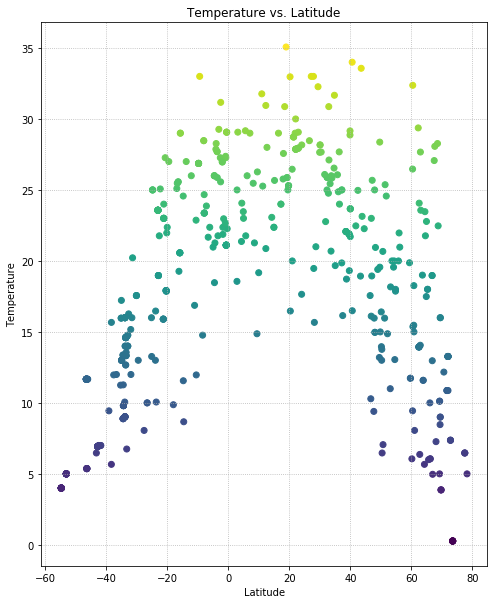

<Figure size 576x720 with 0 Axes>

In [201]:
# build a series of scatter plots  Temperature (F) vs. Latitude 
   #x must be latitude since its an horizontal line then y must be longitude
x_axis=result_weather['Latitude'] 
y_axis=result_weather['Temperature']
t=y_axis  #color mapp
    
# Setting the grid   
plt.grid(linestyle='dotted')
#plot configure
plt.scatter(x_axis, y_axis,c=t )

plt.title('Temperature vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


# Setting the x_axis and y_axis limits

# Display the graph
plt.rcParams['figure.figsize'] = [8,10]
plt.savefig('TemperaturevsLatitude.jpg')
plt.show()

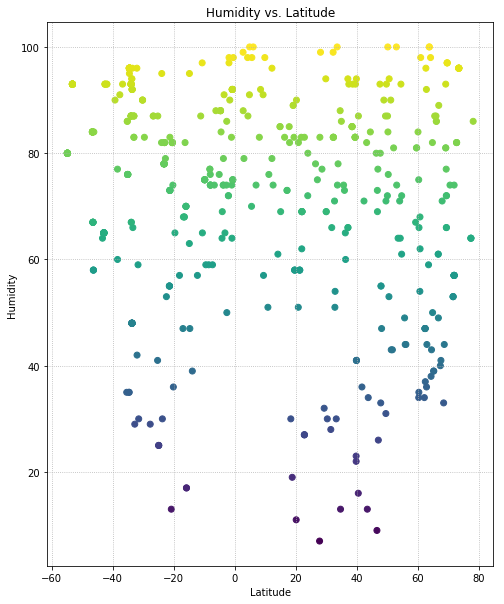

<Figure size 576x576 with 0 Axes>

In [202]:
# build a series of scatter plots   Humidity (%) vs. Latitude 

x_axis=result_weather['Latitude'] 
y_axis=result_weather['Humidity']
t=y_axis  #color mapp
    
# Setting the grid   
plt.grid(linestyle='dotted')
#plot configure
plt.scatter(x_axis, y_axis,c=t )

plt.title('Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


plt.rcParams['figure.figsize'] = [8,8]
plt.savefig('HumidvsLatitude.jpg')
# Display the graph
#plt.show()


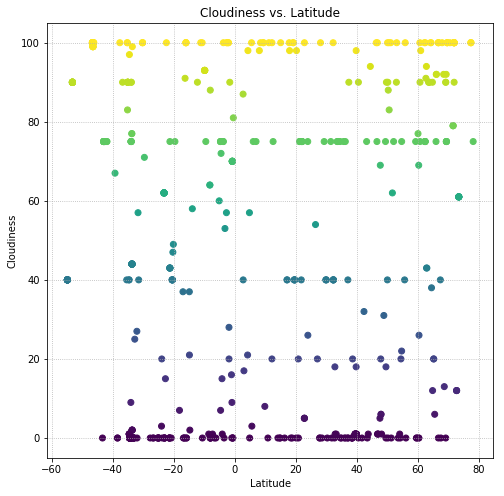

In [198]:
# build a series of scatter plots  Cloudiness (%) vs. Latitude 

x_axis=result_weather['Latitude'] 
y_axis=result_weather['Cloudiness']
t=y_axis  #color mapp
    
# Setting the grid   
plt.grid(linestyle='dotted')
###plt.fill_between(x, y)

#plot configure
plt.scatter(x_axis, y_axis,c=t )

plt.title('Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Setting the x_axis and y_axis limits

# Display the graph
plt.rcParams['figure.figsize'] = [8,10]
plt.savefig('CloudinessvsLatitude.jpg')

plt.show()

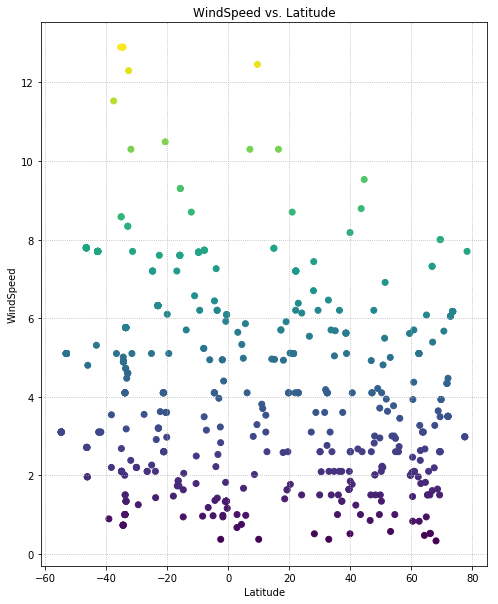

<Figure size 576x720 with 0 Axes>

In [199]:
# build a series of scatter plots  Wind Speed (mph) vs. Latitude


x_axis=result_weather['Latitude'] 
y_axis=result_weather['WindSpeed']
t=y_axis  #color mapp
    
# Setting the grid   
plt.grid(linestyle='dotted')
#plot configure
plt.scatter(x_axis, y_axis,c=t )

plt.title('WindSpeed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.show()

# Display the graph

plt.rcParams['figure.figsize'] = [8,10]
plt.savefig('WindSpeedvsLatitude.jpg')
plt.show()

In [189]:
#Determine correlations between variables
#Correlation Latitude vs Temperature
#result_weather.dtypes
LatvsTemp = result_weather[['Latitude','Temperature']]
correlation = LatvsTemp.corr(method='pearson')

print(f'Correlation between variables Latitude and Termperature is:'+ str( correlation) )

#Correlation Latitude vs Humidity
LatvsHumid = result_weather[['Latitude','Humidity']]
correlation = LatvsHumid .corr(method='pearson')
print(f'Correlation between variables Latitude and Humidity is:'+ str( correlation))

#Correlation Latitude vs Cloudiness
LatvsCloud = result_weather[['Latitude','Cloudiness']]
correlation = LatvsCloud .corr(method='pearson')
print(f'Correlation between variables Latitude and Cloudiness is:'+ str( correlation) )

#Correlation Latitude vs Wind Speed
LatvsWind = result_weather[['Latitude','WindSpeed']]
correlation = LatvsWind .corr(method='pearson')
print(f'Correlation between variables Latitude and Wind Speed is:'+ str( correlation) )


Correlation between variables Latitude and Termperature is:             Latitude  Temperature
Latitude     1.000000     0.234593
Temperature  0.234593     1.000000
Correlation between variables Latitude and Humidity is:          Latitude  Humidity
Latitude  1.000000 -0.195724
Humidity -0.195724  1.000000
Correlation between variables Latitude and Cloudiness is:            Latitude  Cloudiness
Latitude    1.000000    0.027099
Cloudiness  0.027099    1.000000
Correlation between variables Latitude and Wind Speed is:           Latitude  WindSpeed
Latitude   1.000000  -0.185876
WindSpeed -0.185876   1.000000


In [ ]:
# THE END...